# Twitter Sentiment Analysis: 2022 World Cup

Overview:
We're going to analyze people's perception of the 2022 FIFA World Cup from twitter & youtube with negative sentiment represented with label '1' and positive sentiment represented with label '0'. We use Logistic Regression algorithm to classify each tweets and comments.

Training Dataset Source: https://www.kaggle.com/datasets/ferno2/training1600000processednoemoticoncsv

Testing dataset to get insight about the World Cup from Twitter API


# Step 1: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding="ISO-8859-1", names=["target", "ids", "date", "flag", "user", "text"])

In [3]:
#seeing the number of negative and positive labeled data
print("The shape of negative labeled tweets: ")
print(df[df['target'] == 0].shape)
print("The shape of positive labeled tweets: ")
print(df[df['target'] == 4].shape)

The shape of negative labeled tweets: 
(800000, 6)
The shape of positive labeled tweets: 
(800000, 6)


To prevent the model from taking too long to train, we only take a subset of the given data

In [4]:
df_label_one = df[df['target']==4]
df_label_one.drop(df_label_one.index[:-30000], axis=0, inplace=True)
df_label_one

df_label_zero = df[df['target']==0]
df_label_zero.drop(df_label_zero.index[:-30000], axis=0, inplace=True)
df_label_zero

frames_1 = [df_label_zero, df_label_one]
pd.set_option('display.max_rows', 10)
tweets_df= pd.concat(frames_1, ignore_index = True)

C:\Users\rangg\AppData\Local\Temp\ipykernel_24544\3575325507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label_one.drop(df_label_one.index[:-30000], axis=0, inplace=True)
C:\Users\rangg\AppData\Local\Temp\ipykernel_24544\3575325507.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label_zero.drop(df_label_zero.index[:-30000], axis=0, inplace=True)


In [5]:
print(df_label_one.shape)
print(df_label_zero.shape)

(30000, 6)
(30000, 6)


In [6]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  60000 non-null  int64 
 1   ids     60000 non-null  int64 
 2   date    60000 non-null  object
 3   flag    60000 non-null  object
 4   user    60000 non-null  object
 5   text    60000 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.7+ MB


In [7]:
tweets_df.describe()
tweets_df

,target,ids,date,flag,user,text
0,0,2301837518,Tue Jun 23 15:58:52 PDT 2009,NO_QUERY,katrinaa_x,away upstairs to bed. gonna miss you twitter. ...
1,0,2301837999,Tue Jun 23 15:58:55 PDT 2009,NO_QUERY,Professional112,movie theater here isnt doing midnight showin...
2,0,2301838237,Tue Jun 23 15:58:56 PDT 2009,NO_QUERY,dickiesaurussex,home and bored. feel like chattin to people on...
3,0,2301838354,Tue Jun 23 15:58:56 PDT 2009,NO_QUERY,LuPrinz,@travisWfreeman why are you leaving us???
4,0,2301838493,Tue Jun 23 15:58:57 PDT 2009,NO_QUERY,SueFisk,@shiregames
...,...,...,...,...,...,...
59995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
59996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
59997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
59998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [8]:
# Drop the 'id' column
tweets_df = tweets_df.drop(['ids'], axis=1)
tweets_df = tweets_df.drop(['date'], axis=1)
tweets_df = tweets_df.drop(['flag'], axis=1)
tweets_df = tweets_df.drop(['user'], axis=1)

tweets_df.rename(columns = {'target':'label'}, inplace = True)
tweets_df

,label,text
0,0,away upstairs to bed. gonna miss you twitter. ...
1,0,movie theater here isnt doing midnight showin...
2,0,home and bored. feel like chattin to people on...
3,0,@travisWfreeman why are you leaving us???
4,0,@shiregames
...,...,...
59995,4,Just woke up. Having no school is the best fee...
59996,4,TheWDB.com - Very cool to hear old Walt interv...
59997,4,Are you ready for your MoJo Makeover? Ask me f...
59998,4,Happy 38th Birthday to my boo of alll time!!! ...


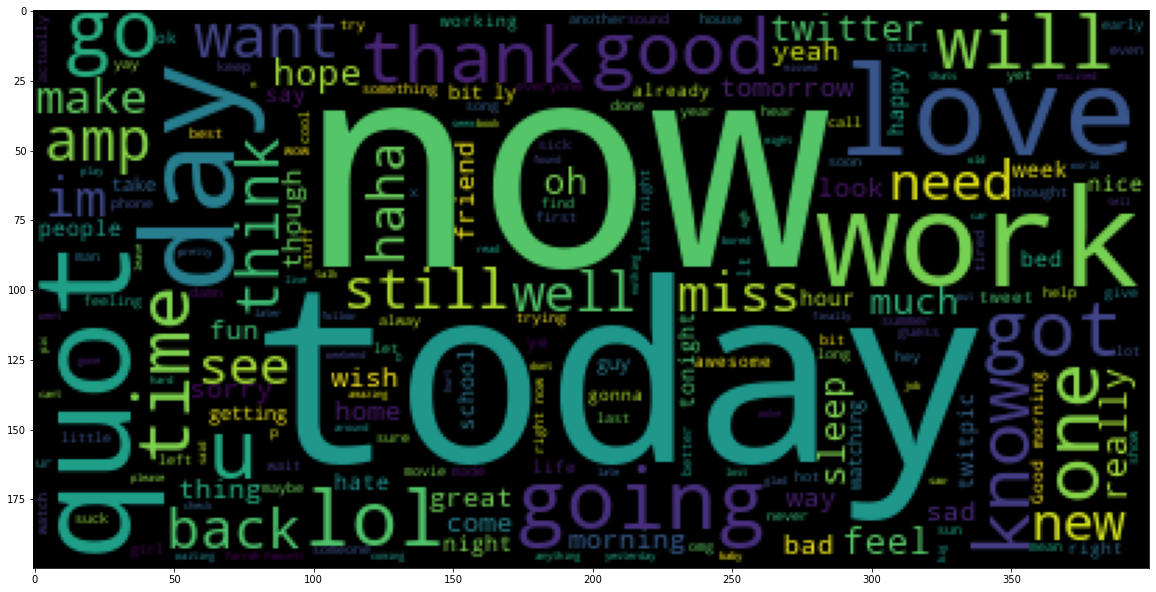

In [9]:
from wordcloud import WordCloud

sentences = tweets_df['text'].tolist()
sentence_as_one = " ".join(sentences)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentence_as_one))

# Step 2: Importing data from SQL Database

In [10]:
df_fwc = pd.read_csv('fwc.csv')
input_count = df_fwc.shape[0]

print(input_count)

400


We then combine the data from the dataset and the twitter API into df_all dataframe. This is important to ensure equal number of features for both dataset

The data from twitter API is not labeled. Therefore, for the sake of dataset completeness to make it possible to combine both dataframe, we assign all tweets with label '1'. This doesnt matter because the label won't be used as an input to the classifier model. It's done with the code below:

In [11]:
one_label = [4 for i in range(input_count)]
df_fwc['label'] = one_label #assigning all tweets with label '1'

#Combining model and testing dataset
frames = [tweets_df, df_fwc]
pd.set_option('display.max_rows', 10)
df_all= pd.concat(frames, ignore_index = True)
df_all

,label,text
0,0,away upstairs to bed. gonna miss you twitter. ...
1,0,movie theater here isnt doing midnight showin...
2,0,home and bored. feel like chattin to people on...
3,0,@travisWfreeman why are you leaving us???
4,0,@shiregames
...,...,...
60395,4,QatarWorldCup being accused of sports washing ...
60396,4,RT Cristiano Ronaldo is expected to make his 2...
60397,4,Ismaila Sarr has been one of the standout play...
60398,4,The World Cup 2022 is well under way in Qatar ...


# Step 3: Removing Punctuations and Stopwords

To ensure the value of each data, both the punctuations and stopwords will be removed

In [12]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rangg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Remove Punctuation and Stopwords
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [14]:
# Trying the function, THis function takes a minute
# df_all_cleaned = df_all['text'].apply(message_cleaning)
import gensim

df_all['text'].apply(gensim.utils.simple_preprocess)

print(df_all)

       label                                               text
0          0  away upstairs to bed. gonna miss you twitter. ...
1          0   movie theater here isnt doing midnight showin...
2          0  home and bored. feel like chattin to people on...
3          0         @travisWfreeman why are you leaving us??? 
4          0                                       @shiregames 
...      ...                                                ...
60395      4  QatarWorldCup being accused of sports washing ...
60396      4  RT Cristiano Ronaldo is expected to make his 2...
60397      4  Ismaila Sarr has been one of the standout play...
60398      4  The World Cup 2022 is well under way in Qatar ...
60399      4  Another 3 hour TheFootballShow 157 now with Ch...

[60400 rows x 2 columns]


# Step 4: Performing Vectorization

To ensure model fitting can happen, we convert the tweet data into vectors through vectorization.
Here the motivation for using TfidVectorizer is that, TF-IDF have performed more favorably vs. Count Vectorizer, most likely because TF-IDF works by using document frequency, which means regular and words that often appeared have their contribution suppressed, whereas the contribution of words that are unique and provide context are kept.
![](TFIDF.jpg)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=3,  max_features=None,
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1,3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')
tweets_countvectorizer = vectorizer.fit_transform(df_all['text'])
X_all = pd.DataFrame(tweets_countvectorizer.toarray())
#print(X_all)
print(X_all.iloc[0])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
29360    0.0
29361    0.0
29362    0.0
29363    0.0
29364    0.0
Name: 0, Length: 29365, dtype: float64


In [16]:
print(vectorizer.get_feature_names())


['0', '0 0', '0 5', '0 software', '0 tomorrow', '0 update', '00', '00 morning', '000', '000 followers', '000 people', '000 usdt', '000 usdt giveaway', '000th', '007peter', '00am', '00mony00', '00pm', '01', '02', '03', '04', '05', '06', '06 25', '06 25 obit', '07', '08', '09', '1', '1 0', '1 000', '1 1', '1 15', '1 2', '1 2 3', '1 2 hour', '1 2 hours', '1 2 hr', '1 2 years', '1 3', '1 30', '1 30 morning', '1 30pm', '1 35', '1 4', '1 40', '1 45', '1 5', '1 5 hours', '1 6', '1 7', '1 9', '1 amp', '1 baby', '1 day', '1 download', '1 download okx', '1 follower', '1 friends', '1 hi', '1 hour', '1 hr', '1 minute', '1 minute thinking', '1 month', '1 night', '1 pm', '1 priority', '1 s', '1 summer', '1 thing', '1 trending', '1 week', '1 year', '10', '10 15', '10 30', '10 30pm', '10 4', '10 40', '10 day', '10 days', '10 fifaworldcup', '10 haha', '10 hours', '10 just', '10 kills', '10 min', '10 mins', '10 minutes', '10 month', '10 pounds', '10 s', '10 things', '10 times', '10 year', '10 years', '1

c:\Users\rangg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Step 5: Train and Evaluate Logistic Regression Model

In [17]:
# We exclude the last 100 data since it contains the World Cup tweets that we're going to analyze
# We dont want the training model to access testing data
X_modeling = X_all[:-input_count]
y_modeling = df_all[:-input_count]['label']


In [18]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_modeling, y_modeling, test_size=0.1)


## Math behind Logistic Regression

Logistic Regression is often used in classification problem, specifically in cases where we need to predict data that is categorical. This is different in comparison to Linear Regression where the prediction is made for continous data. The essence of Logistic Regression is how to map the continous function we obtained in Linear Regression to the value we need. This is achieved by the use of the sigmoid function.


![Sigmoid_1](Formula.jpg)
![Sigmoid_2image.png](Sigmoid.jpg)

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      2982
           4       0.74      0.76      0.75      3018

    accuracy                           0.75      6000
   macro avg       0.75      0.75      0.75      6000
weighted avg       0.75      0.75      0.75      6000



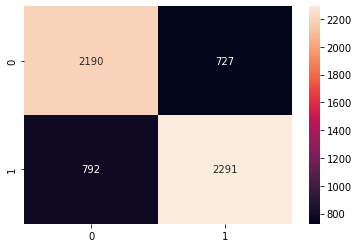

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Applying Logistic Regression model
model = LogisticRegression(solver='liblinear',C=10, penalty='l2', tol=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Generating confusion Matrix and classification report
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True, fmt = 'g')

print(classification_report(y_test, y_pred))

# Step 6: Applying the model to World Cup related tweets & comments

In [20]:
#Testing the model on World Cup tweets
print(input_count)
y_predict_fwc = model.predict(X_all[-input_count:])
df_all.iloc[-input_count:]['label'] = y_predict_fwc
df_fwc = df_all.iloc[-input_count:]
y_predict_fwc

400


C:\Users\rangg\AppData\Local\Temp\ipykernel_24544\1114248707.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all.iloc[-input_count:]['label'] = y_predict_fwc


array([4, 4, 4, 0, 0, 4, 4, 0, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 0, 4, 4, 4, 4, 0, 4, 4, 0, 0, 4, 0, 0, 4, 4, 4, 4, 0, 4, 0, 0,
       4, 0, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4,
       4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 0, 4, 0, 4, 0, 4, 4, 4, 0, 4, 4, 4,
       4, 0, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 0, 4,
       4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 0, 4, 4,
       4, 4, 4, 0, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4,
       4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 0,
       4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 4, 4,
       4, 0, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 4, 0, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 4, 0, 4, 4,
       4, 4, 4, 0, 4, 0, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 4, 0, 4, 4,
       4, 0, 0, 4, 4, 0, 4, 4, 4, 0, 4, 4, 0, 4, 4,

In [21]:
print("The number of positive labeled tweets out of are : ")
print(len(y_predict_fwc[y_predict_fwc == 4]))
print("The number of negative labeled tweets out of are : ")
print(len(y_predict_fwc[y_predict_fwc == 0]))

The number of positive labeled tweets out of are : 
323
The number of negative labeled tweets out of are : 
77


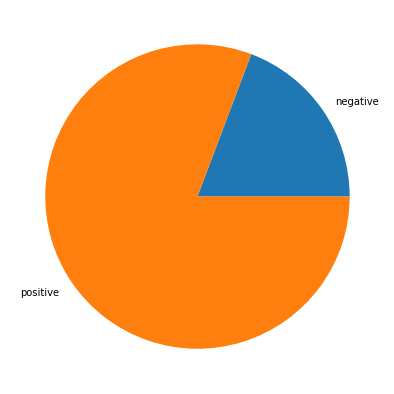

In [22]:
# Creating dataset
sentiment = [ 'negative', 'positive']
 
data = [len(y_predict_fwc[y_predict_fwc == 0]), len(y_predict_fwc[y_predict_fwc == 4])]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = sentiment)
 
# show plot
plt.show()

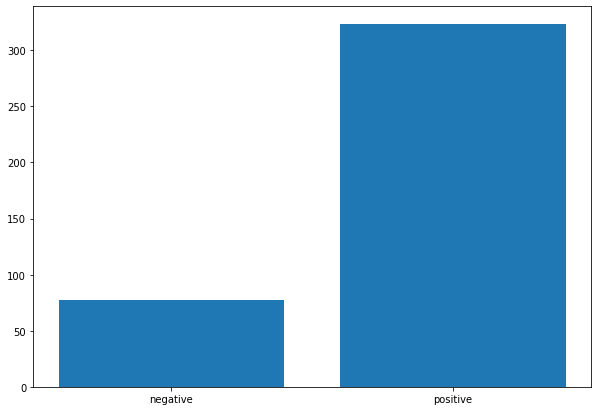

In [23]:
fig = plt.figure(figsize =(10, 7))
plt.bar(sentiment, data)
 
# show plot
plt.show()

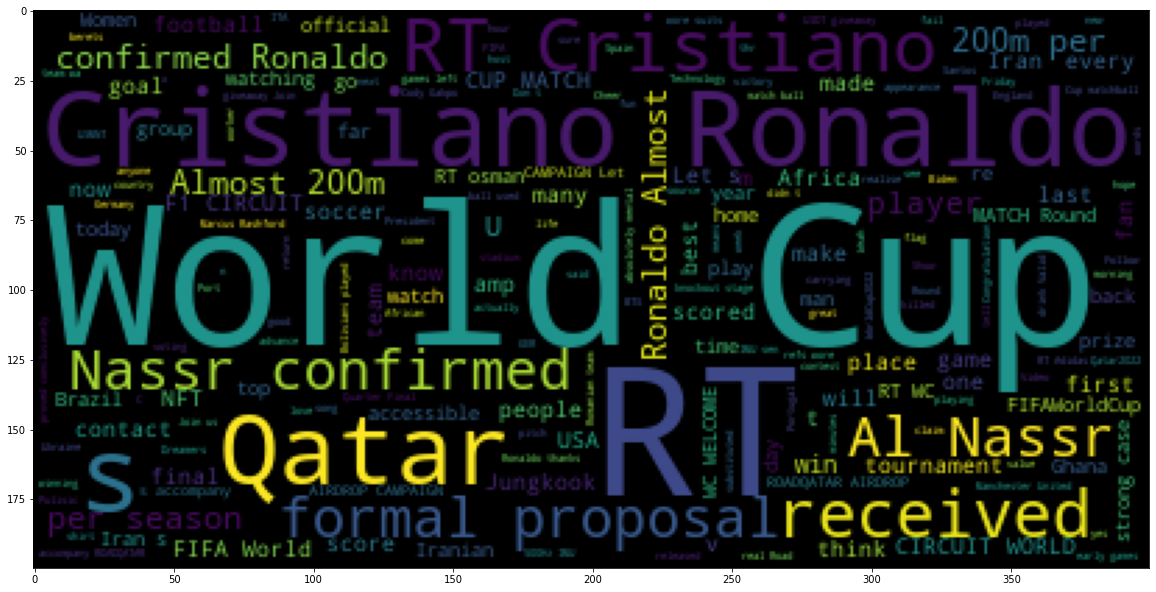

In [24]:
from wordcloud import WordCloud

sentences = df_fwc['text'].tolist()
sentence_as_one = " ".join(sentences)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentence_as_one))